In [1]:
from function.VAE import *

In [2]:
import matplotlib.pyplot as plt 
from IPython.display import clear_output #

On teste le VAE sur une distribution gaussienne tronquée tel que les coordonnées des vecteurs soient supérieurs à un seuil.  

Pour des soucis d'efficacité et de faisabilité on choisit de tronquer seulement sur 2 coordonnées. 

In [3]:
#Simulation of a truncated normal distribution 
def truncatedDistribution(n_samples, dim, mean, variance, lower, higher):
    sd = np.sqrt(variance)
    L = list()
    i = 0 
    while i < n_samples:
        prop = np.random.normal(loc = mean, scale=sd)
        #prop_norm = np.linalg.norm(prop[0:2], ord=-np.inf)

        if prop[0] > higher and prop[1] > higher : 
            L.append(prop)
            i += 1
            if i %10 == 0:
                clear_output(wait=True)
                print("boucle %d terminéE" %(i))

    return np.array(L)


In [4]:
#dist = truncatedDistribution(10000, 20, np.zeros(20), np.ones(20), 2, 2)
#dist.shape

boucle 10000 terminéE


(10000, 20)

In [5]:
#np.save('2_component_truncated.npy', dist)

In [8]:
dist = np.load('2_component_truncated.npy')
dist.shape

(10000, 20)

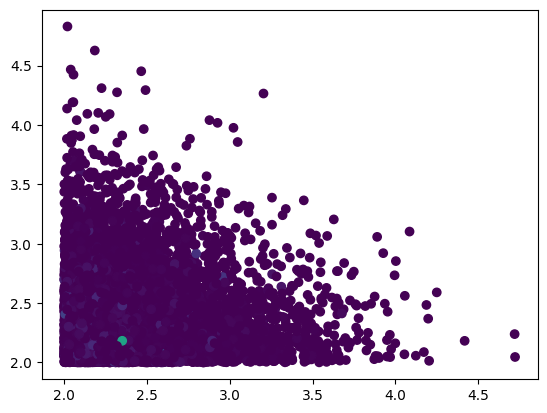

In [9]:
kde = sp.gaussian_kde(dist.T)
plt.scatter(dist[:,0], dist[:,1], c = kde(dist.T));

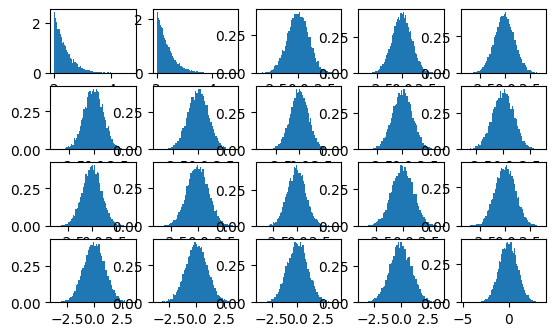

In [10]:
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.hist(dist[:, i],bins= 'auto', density=True);

In [11]:
encoder = Encoder(2)
decoder = Decoder(2)

In [12]:
vae = VAE(encoder, decoder)

In [13]:
vae.compile(optimizer= tf.keras.optimizers.Adam(learning_rate= 1e-3))
history = vae.fit(dist,epochs=10,
    batch_size=32,
    shuffle=True)

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - kl_loss: 2.0571 - loss: 16.4493 - reconstruction_loss: 14.3922
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - kl_loss: 0.0258 - loss: 10.9964 - reconstruction_loss: 10.9706
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - kl_loss: 0.0041 - loss: 9.2384 - reconstruction_loss: 9.2343
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - kl_loss: 0.0012 - loss: 8.1118 - reconstruction_loss: 8.1106
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - kl_loss: 3.2605e-04 - loss: 7.8943 - reconstruction_loss: 7.8940
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - kl_loss: 2.3076e-04 - loss: 7.8411 - reconstruction_loss: 7.8409
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - kl_loss: 1.0017e-04 - loss: 7.8483 - reconstruction_loss: 7.8482
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - kl_loss: 5.8226e-05 - loss: 7.8102 - reconstruction_loss: 7.8101
Epoch 9/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - kl_los

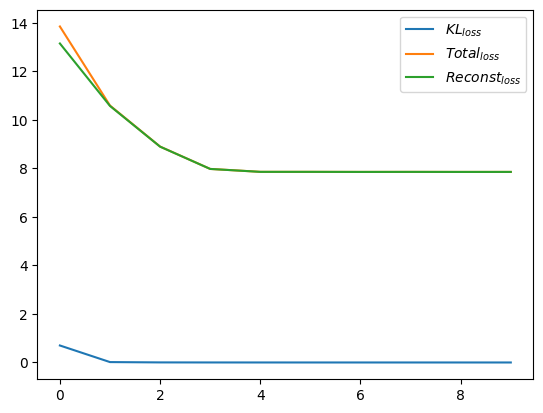

In [15]:
plt.plot(history.history['kl_loss'], label = r'$KL_{loss}$')
plt.plot(history.history['loss'], label = r'$Total_{loss}$')
plt.plot(history.history['reconstruction_loss'], label = r'$Reconst_{loss}$')
plt.legend()

In [16]:
_,_, z = encoder(dist)
mean_x, log_var_x = decoder(z) #we get each mean and log variance of the several distribution then we sample from it 

sample = np.random.normal(loc=mean_x, scale= tf.exp(log_var_x/2))

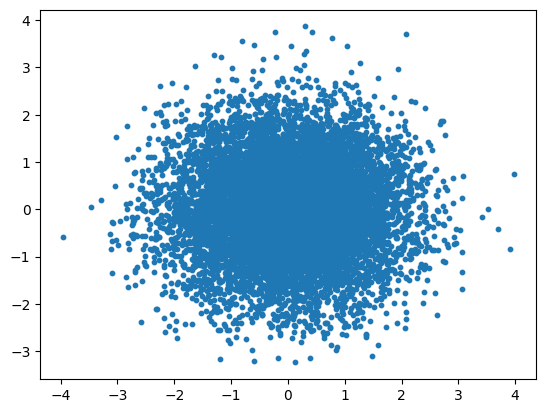

In [17]:
plt.scatter(z[:, 0], z[:, 1], s = 10)

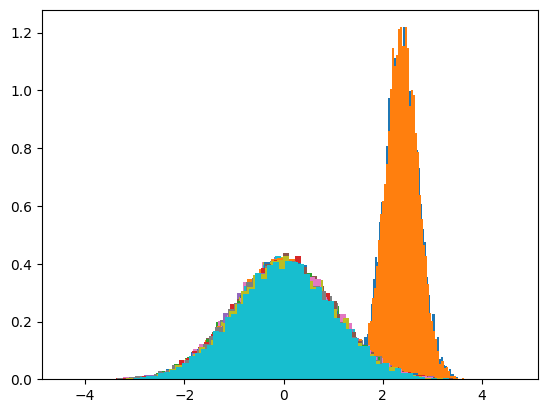

In [18]:
for i in range(20):
    #plt.subplot(5,5,i+1)
    plt.hist(sample[:, i],bins= 'auto', density=True);

In [19]:
print(f"La moyenne empirique de la  1er composante {np.mean(mean_x, axis=0)[0]} et la moyenne théorique  {sp.norm.pdf(2)/(1-sp.norm.cdf(2))}" )
print(f"Moyenne empirique {np.mean(tf.exp(log_var_x/2), axis = 0 )[0]}, moyenne théorique {np.sqrt(1 - sp.norm.pdf(2)/(1-sp.norm.cdf(2)) * (sp.norm.pdf(2)/(1-sp.norm.cdf(2)) - 2))}")

La moyenne empirique de la  1er composante 2.3693594932556152 et la moyenne théorique  2.373215532822841
Moyenne empirique 0.3409057855606079, moyenne théorique 0.33805191970181275
